## Dataset Description: Finance Default Prediction

***This dataset contains financial information for **10,000 individuals** and is used to predict whether a person will **default on their account**.  
It’s designed for a **binary classification** task and is ideal for comparing **classical ML models** and **neural networks**.***

**Source:** Kaggle – Finance Dataset  
**File Format:** Excel (`Default.xlsx`)  
**Sheet Name:** `Sheet1`

### Features
- **balance:** Account balance (numeric)  
- **income:** Monthly income (numeric)  
- **student:** Whether the individual is a student (yes/no)  
- **age:** Age of the individual (numeric)  

### Target Variable
- **default:** Indicates whether the person defaulted (yes/no)



In [3]:
! pip install openpyxl


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


# 1. Setup & Preprocessing

***In this step, we import the necessary libraries, load the financial dataset, encode categorical columns, and split the data into training and testing sets for modeling.***


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error
import time

# Load dataset
df= pd.read_excel('Default.xlsx')  # Replace with your actual path

# Encode categorical variables
le = LabelEncoder()
df['student'] = le.fit_transform(df['student'])
df['default'] = le.fit_transform(df['default'])  # Target variable

# Features and target
X = df.drop('default', axis=1)
y = df['default']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

C:\Python313\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


# 2.Classical Machine Learning: Random Forest
***We train a Random Forest classifier as our classical ML model. It is evaluated using accuracy, precision, recall, F1 score, and RMSE to measure prediction quality and training efficiency.***


In [8]:
from sklearn.ensemble import RandomForestClassifier

start_rf = time.time()
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
end_rf = time.time()

# Predictions
y_pred_rf = rf.predict(X_test)

# Metrics
print("Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))
print("RMSE:",mean_squared_error(y_test, y_pred_rf))  # This returns the squared RMSE)
print("Training Time:", round(end_rf - start_rf, 2), "seconds")

Random Forest Results:
Accuracy: 0.969
Precision: 0.6206896551724138
Recall: 0.2608695652173913
F1 Score: 0.3673469387755102
RMSE: 0.031
Training Time: 7.6 seconds


# 3. Neural Network: Feed-Forward MLP
***A simple Multi-Layer Perceptron (MLP) is trained on scaled features. It uses two hidden layers with ReLU activation and a sigmoid output for binary classification. Metrics and training time are recorded for comparison with classical ML.***


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build model
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

start_nn = time.time()
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=0)
end_nn = time.time()

# Predictions
y_pred_nn = (model.predict(X_test_scaled) > 0.5).astype("int32")

# Metrics
print("\nNeural Network Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_nn))
print("Precision:", precision_score(y_test, y_pred_nn))
print("Recall:", recall_score(y_test, y_pred_nn))
print("F1 Score:", f1_score(y_test, y_pred_nn))
print("RMSE:",mean_squared_error(y_test, y_pred_rf))
print("Training Time:", round(end_nn - start_nn, 2), "seconds")

C:\Python313\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step

Neural Network Results:
Accuracy: 0.967
Precision: 0.5405405405405406
Recall: 0.2898550724637681
F1 Score: 0.37735849056603776
RMSE: 0.031
Training Time: 151.62 seconds


## 4. Model Performance Comparison
***A bar chart compares Random Forest and Neural Network across key metrics: Accuracy, Precision, Recall, F1 Score, and RMSE.***


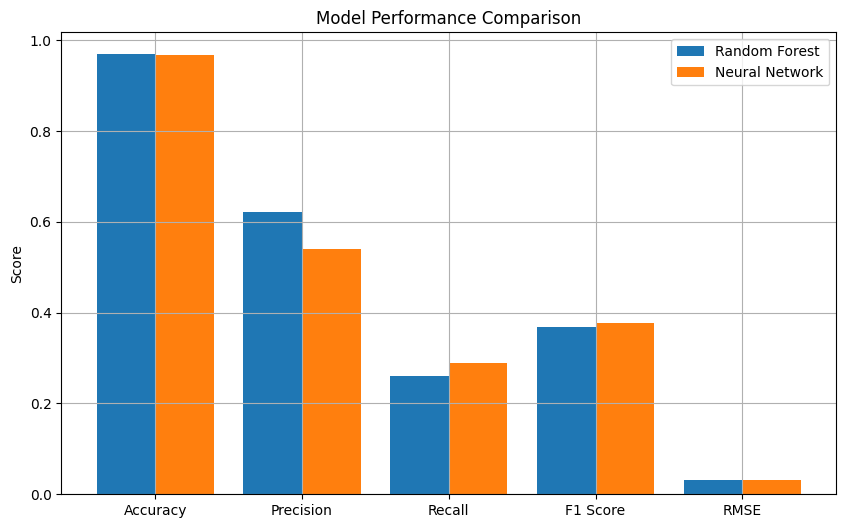

In [11]:
import matplotlib.pyplot as plt

# Metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'RMSE']
rf_scores = [0.969, 0.6207, 0.2609, 0.3673, 0.031]
nn_scores = [0.967, 0.5405, 0.2899, 0.3774, 0.031]

x = range(len(metrics))

plt.figure(figsize=(10, 6))
plt.bar(x, rf_scores, width=0.4, label='Random Forest', align='center')
plt.bar([i + 0.4 for i in x], nn_scores, width=0.4, label='Neural Network', align='center')
plt.xticks([i + 0.2 for i in x], metrics)
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.legend()
plt.grid(True)
plt.show()

## 5. Model Comparison Visualization

***This section visualizes and compares the performance and training time of the Random Forest and Neural Network models using line, bar, and scatter plots.***

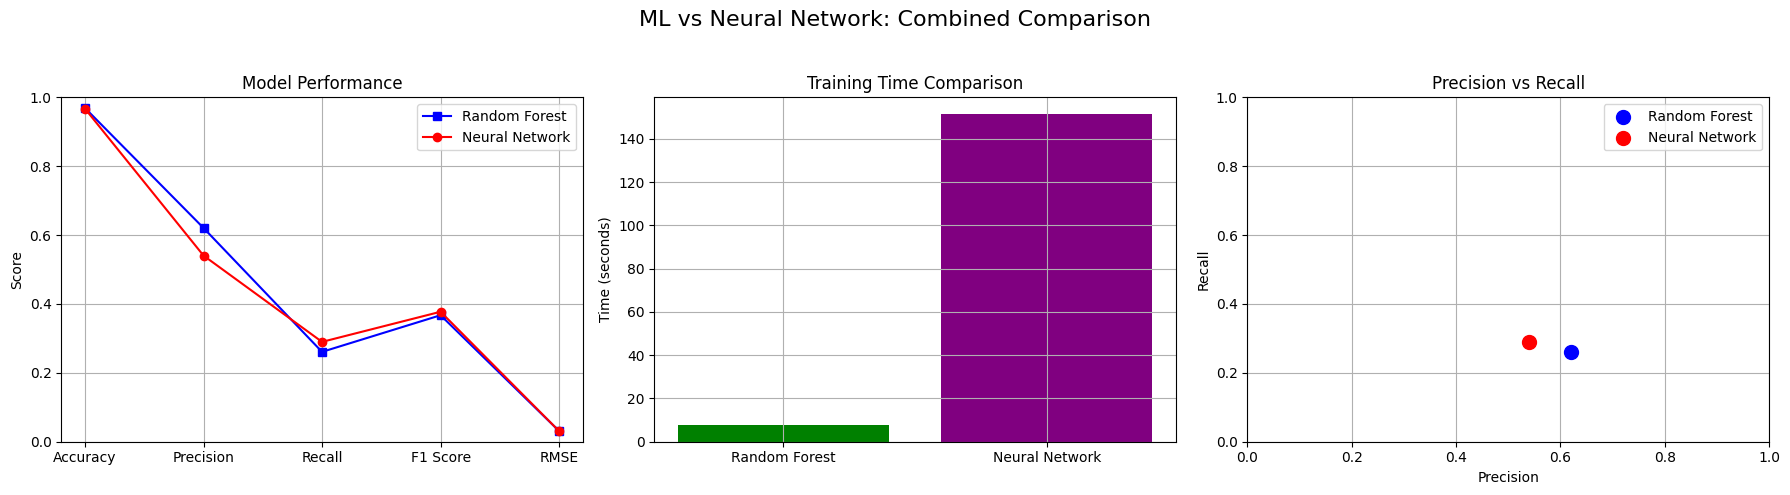

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Data
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'RMSE']
rf_scores = [0.969, 0.6207, 0.2609, 0.3673, 0.031]
nn_scores = [0.967, 0.5405, 0.2899, 0.3774, 0.031]
training_times = [7.6, 151.62]
models = ['Random Forest', 'Neural Network']

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Line graph: Performance metrics
axs[0].plot(metrics, rf_scores, marker='s', label='Random Forest', color='blue')
axs[0].plot(metrics, nn_scores, marker='o', label='Neural Network', color='red')
axs[0].set_title('Model Performance')
axs[0].set_ylim(0, 1)
axs[0].set_ylabel('Score')
axs[0].grid(True)
axs[0].legend()

# Bar chart: Training time
axs[1].bar(models, training_times, color=['green', 'purple'])
axs[1].set_title('Training Time Comparison')
axs[1].set_ylabel('Time (seconds)')
axs[1].grid(True)

# Scatter plot: Precision vs Recall
axs[2].scatter(rf_scores[1], rf_scores[2], color='blue', label='Random Forest', s=100)
axs[2].scatter(nn_scores[1], nn_scores[2], color='red', label='Neural Network', s=100)
axs[2].set_title('Precision vs Recall')
axs[2].set_xlabel('Precision')
axs[2].set_ylabel('Recall')
axs[2].set_xlim(0, 1)
axs[2].set_ylim(0, 1)
axs[2].grid(True)
axs[2].legend()

# Layout
plt.suptitle('ML vs Neural Network: Combined Comparison', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

## 6. Model Evaluation Summary

**Overview:** Compare Random Forest vs Neural Network on accuracy, recall, precision, F1, RMSE, and training time.

- **Accuracy:** RF 96.9%, NN 96.7% → both high, RF slightly better  
- **Recall (defaulters):** NN 28.9% > RF 26.1% → NN catches more defaulters  
- **Precision (reliability):** RF 62.1% > NN 54.1% → RF more reliable  
- **F1 Score (balance):** NN 0.377 > RF 0.367 → NN slightly more balanced  
- **Training Time:** RF 7.6s << NN 151.6s → RF much faster  
- **RMSE:** Both 0.031 → similar prediction error  

**Insight:**  
- Use **Random Forest** for speed and reliability.  
- Use **Neural Network** for better recall and metric balance.
